In [1]:
import matplotlib.pyplot as plt
import numpy as np

# radar plot

In [66]:
# 데이터 정의
theta = 'Incomprehensible(1) Disfluent(2) Good(3) Flawless(4)'.split()

v1 = [5, 17, 29, 47]
v2 = [4, 21, 18, 55]
v3 = [2, 9, 25, 62]
v4 = [3, 15, 41, 39]

In [69]:
labels = theta.copy()

num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, len(theta), endpoint=False).tolist()

In [70]:
# 원형 배치를 위해 1번째 값 추가
values = []
for v in (v1, v2, v3, v4):
    tmp = v.copy()
    tmp.append(v[0])
    values.append(tmp)
angles += angles[:1]
labels += [labels[0]]

In [77]:
legends = 'Judge_A Judge_B Judge_C Judge_D'.split()

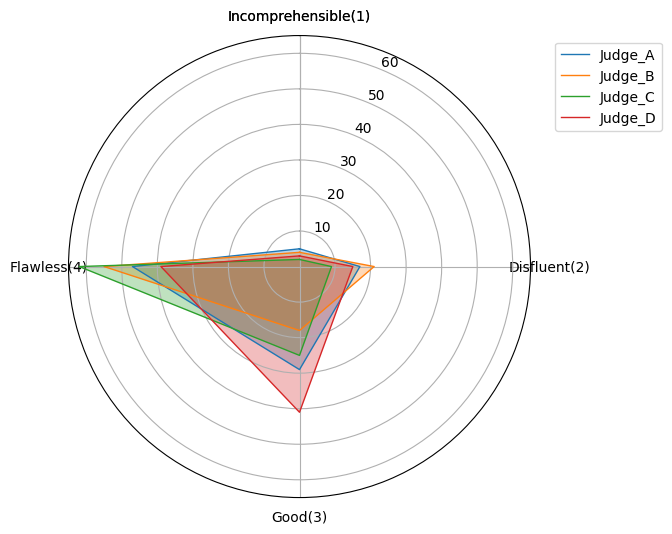

In [105]:
fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(polar=True))

for value, legend in zip(values, legends):
    ax.plot(angles, value, linewidth=1, label=legend)
    ax.fill(angles, value, alpha=.3)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles), labels)

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.title('GNMT - Fluency (%)', position=(0.1, 1))
plt.savefig('fig4.1.png', dpi=300)
plt.show()

In [123]:
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=16)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=16)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=16)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=14)  # 범례 폰트 크기
plt.rc('figure', titlesize=14) # figure title 폰트 크기

In [119]:
def radar_plot(labels: list, data: dict, fname: str):
    num_labels = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_labels, endpoint=False).tolist()

    # 원형 배치를 위해 1번째 값 추가:
    for v in data.values():
        v.append(v[0])
    angles += angles[:1]
    labels += labels[:1]
    
    # display:
    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(polar=True))

    for legend, value in data.items():
        ax.plot(angles, value, linewidth=1, label=legend)
        ax.fill(angles, value, alpha=.3)

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles), labels)

    #plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.legend()
    #plt.title('GNMT - Fluency (%)', position=(0.1, 1))
    plt.savefig(f'{fname}.png', dpi=300)
    print("saved")
    plt.show()

saved


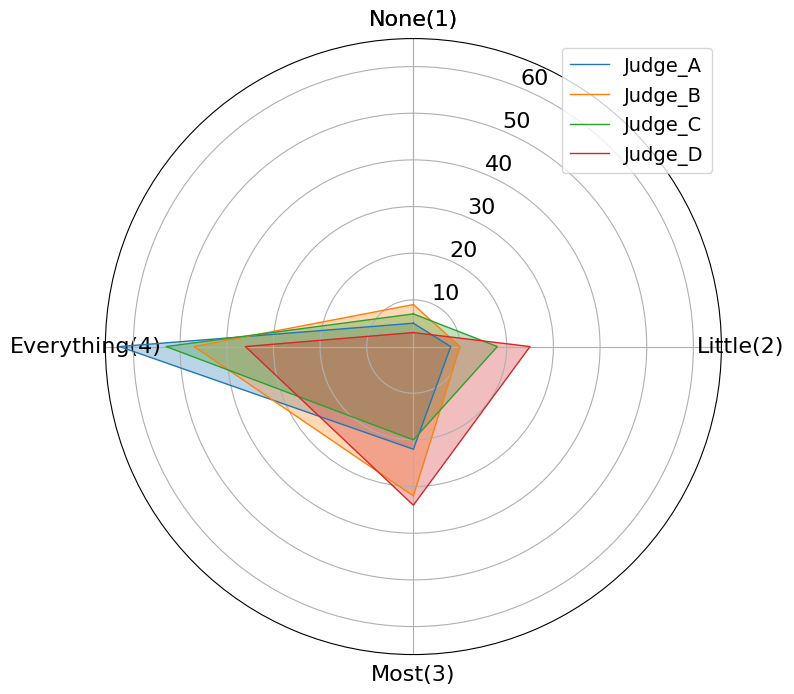

In [125]:
labels = 'None(1) Little(2) Most(3) Everything(4)'.split()
data = {
    'A_judge': [5, 8, 22, 63],
    'B_judge': [9, 10, 32, 47],
    'C_judge': [7, 18, 20, 53],
    'D_judge': [3, 25, 34, 36],
}
fname = '4.2'

radar_plot(labels, data, fname)

saved


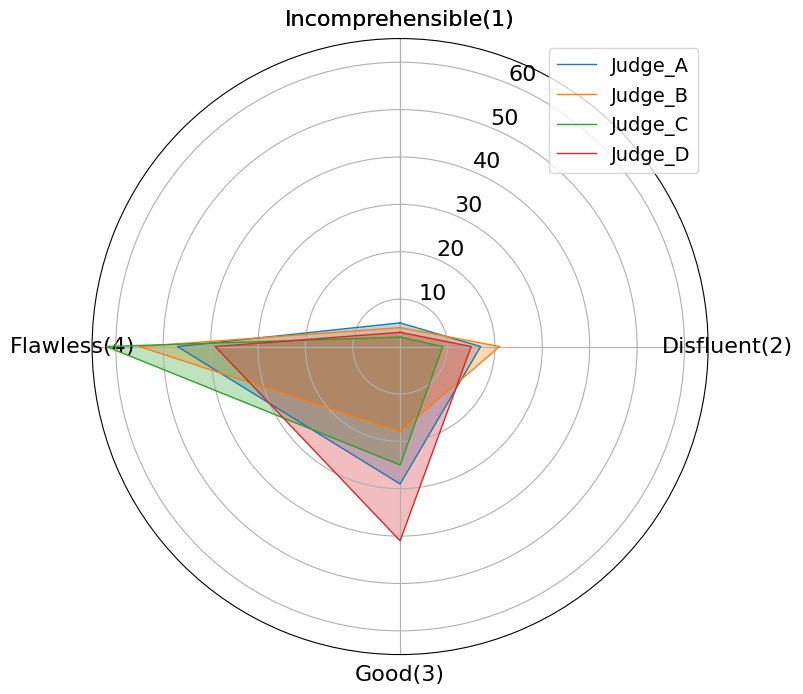

In [126]:
fl_theta = 'Incomprehensible(1) Disfluent(2) Good(3) Flawless(4)'.split()

labels = 'None(1) Little(2) Most(3) Everything(4)'.split()
data = {
    'Judge_A':  [5, 17, 29, 47],
    'Judge_B':  [4, 21, 18, 55],
    'Judge_C': [2, 9, 25, 62],
    'Judge_D': [3, 15, 41, 39],
}
fname = '4.1'
radar_plot(fl_theta, data, fname)

# bar horizontal plot

In [57]:
def display(results, categories):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    cat_colors = plt.colormaps['YlOrRd'](
        np.linspace(0.15, 0.85, data.shape[1]))
    
    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.set_xlim(0, np.sum(data, axis=1).max())
    
    for i, (colname, color) in enumerate(zip(categories, cat_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                       label=colname, color=color)
        r, g, b, _ = color
        text_color = 'black' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncols=len(categories), bbox_to_anchor=(0, 1),
             loc="lower left", fontsize='large')
    return fig, ax

In [67]:
fluency = {
    'labels': 'Incomprehensible(1) Disfluent(2) Good(3) Flawless(4)'.split(),
    'data': {
        '$A_{judge}$': [5, 17, 29, 47],
        '$B_{judge}$': [4, 21, 18, 55],
        '$C_{judge}$': [2, 9, 25, 62],
        '$D_{judge}$': [3, 15, 41, 39],
    }
}
adequacy = {
    'labels': 'None(1) Little(2) Most(3) Everything(4)'.split(),
    'data': {
        '$A_{judge}$': [5, 8, 22, 63],
        '$B_{judge}$': [9, 10, 32, 47],
        '$C_{judge}$': [7, 18, 20, 53],
        '$D_{judge}$': [3, 25, 34, 36],
    }
}
rank1 = {
    'labels': 'Rank_3 Rank_2 Rank_1'.split(),
    'data': {
        'Human$_t$': [79, 17, 4][::-1],
        'GNMT': [12, 31, 56.99][::-1],
        'kakao i': [19, 48, 33][::-1],
    }
}
rank2 = {
    'labels': 'kakao_i GNMT Human$_t$'.split(),
    'data': {
        'Rank_1': [71.81, 10.9, 17.27][::-1],
        'Rank_2': [17.7, 32.29, 50][::-1],
        'Rank_3': [4.25, 60.63, 35.1][::-1],
    }
}


In [68]:
data = {'fluency': fluency,
       'adequacy': adequacy,
       'rank1': rank1,
       'rank2': rank2}

In [69]:
import json

with open('data/figures/pilot_result.json', 'w') as f:
    json.dump(data, f)

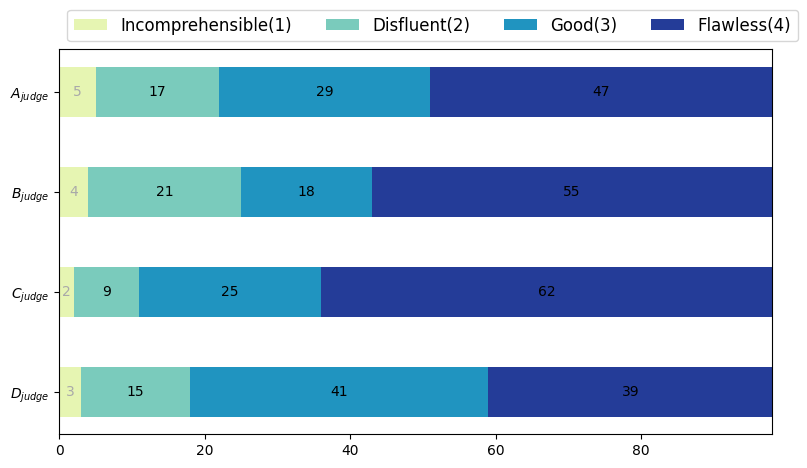

In [33]:
# Fluency
display(results, categories)
#plt.savefig('4.1.png', dpi=300)
plt.show()

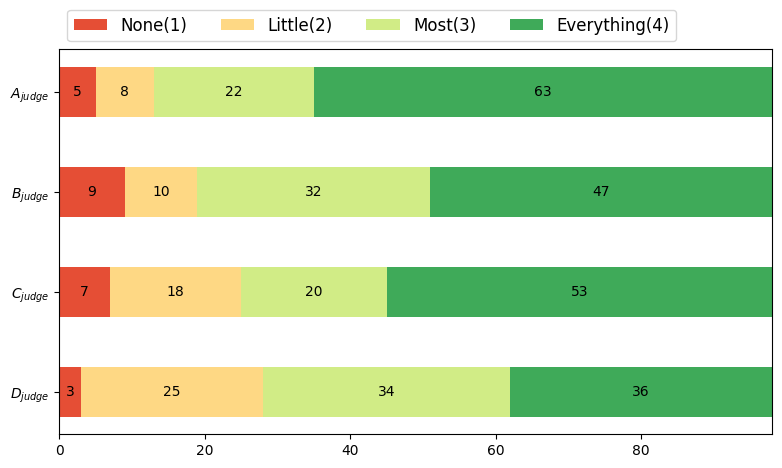

In [25]:
display(results, categories)
plt.savefig('4.2.png', dpi=300)
plt.show()

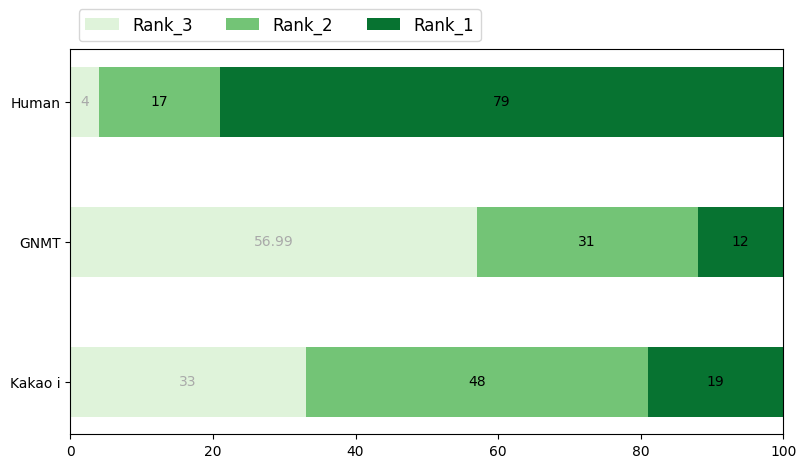

In [49]:
categories = 'Rank_3 Rank_2 Rank_1'.split()
results = {
    'Human': [79, 17, 4][::-1],
    'GNMT': [12, 31, 56.99][::-1],
    'Kakao i': [19, 48, 33][::-1],
}
display(results, categories)
plt.savefig('4.3-1.png', dpi=300)
plt.show()

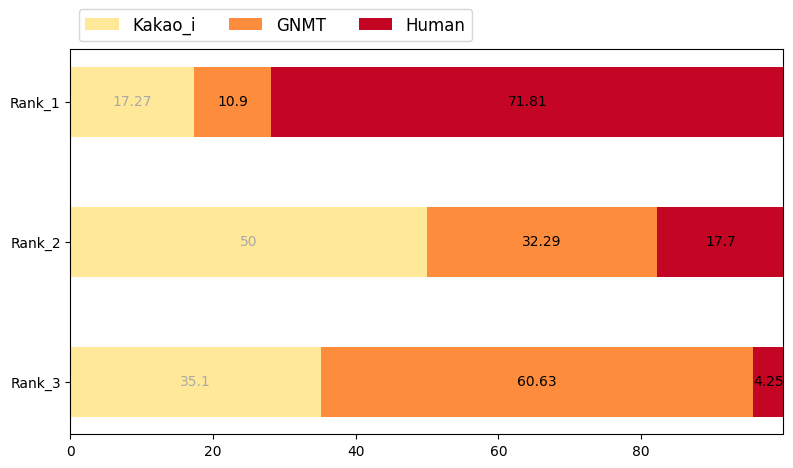

In [60]:
#categories = 'Human GNMT Kakao_i'.split()
categories = 'Kakao_i GNMT Human'.split()
results = {
    'Rank_1': [71.81, 10.9, 17.27][::-1],
    'Rank_2': [17.7, 32.29, 50][::-1],
    'Rank_3': [4.25, 60.63, 35.1][::-1],
}
display(results, categories)
plt.savefig('4.3-2.png', dpi=300)
plt.show()

In [79]:
fluency = {
    'labels': 'Incomprehensible(1) Disfluent(2) Good(3) Flawless(4)'.split(),
    'data': {
        '$P_{judge}$': [1, 17, 30, 52],
        '$Q_{judge}$': [0, 5, 37, 58],
        '$R_{judge}$': [10, 16, 25, 49],
        '$X_{judge}$': [1, 38, 55, 6],
        '$Y_{judge}$': [15, 26, 25, 34],
        '$Z_{judge}$': [2, 17, 32, 49],
    }
}
adequacy = {
    'labels': 'None(1) Little(2) Most(3) Everything(4)'.split(),
    'data': {
        '$P_{judge}$': [10.28, 27.27, 43.48, 18.97],
        '$Q_{judge}$': [0, 18.58, 37.55, 43.87],
        '$R_{judge}$': [0, 13.04, 48.22, 38.74],
        '$X_{judge}$': [0, 12.65, 70.36, 17],
        '$Y_{judge}$': [5.14, 24.51, 32.81, 37.55],
        '$Z_{judge}$': [0.4, 7.51, 47.43, 44.66],
    }
}

In [75]:
def bar_horizontal_plot(labels: list, data: dict, color='RdYlGn'):
    categories = list(data.keys()) # judge a, b, c, ...
    data = np.array(list(data.values()))
    data_cum = data.cumsum(axis=1)
    cat_colors = plt.colormaps[color](
        np.linspace(0.15, 0.85, data.shape[1]))
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.invert_yaxis()
    ax.set_xlim(0, np.sum(data, axis=1).max())
    
    for i, (colname, color) in enumerate(zip(labels, cat_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(categories, widths, left=starts, height=0.5,
                       label=colname, color=color)
        r, g, b, _ = color
        text_color = 'black' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncols=len(labels), bbox_to_anchor=(0, 1),
             loc="lower left", fontsize='large')
    return fig, ax

def display(func, fname: str, **kwargs):
    func(**kwargs)
    plt.savefig(fname, dpi=300)
    plt.show()

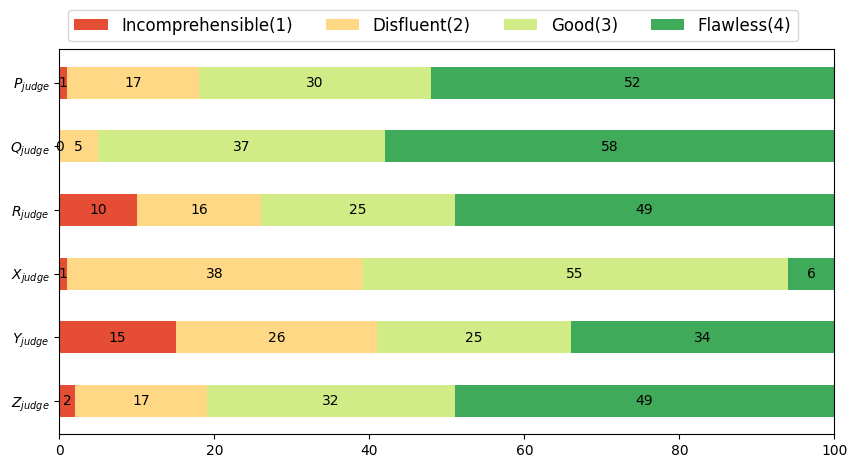

In [77]:
kwargs = {'labels': fluency['labels'], 'data': fluency['data'], 'color': 'RdYlGn'}
display(bar_horizontal_plot, '6.1.png', **kwargs)

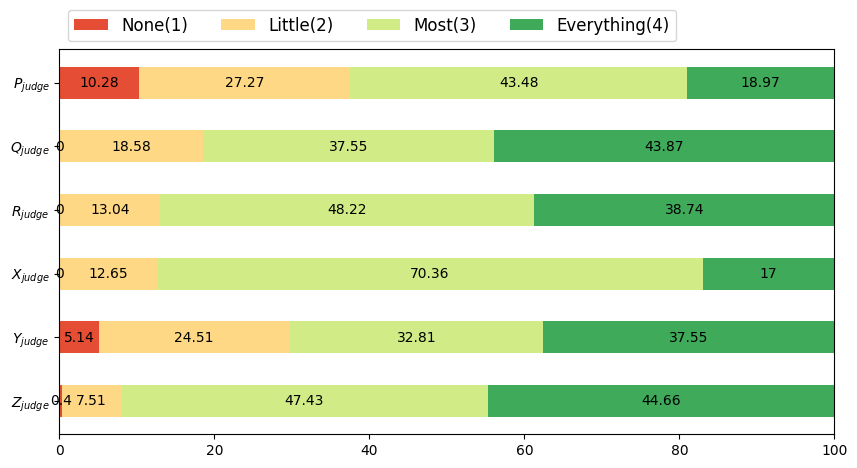

In [80]:
kwargs = {'labels': adequacy['labels'], 'data': adequacy['data'], 'color': 'RdYlGn'}
display(bar_horizontal_plot, '6.2.png', **kwargs)

### ranking

In [87]:
p = {
    'labels': 'Rank_3 Rank_2 Rank_1'.split(),
    'data': {
        'Rank_1': [],
        'Rank_2': [],
        'Rank_3': [],
    }
}
q = {
    'labels': 'Rank_3 Rank_2 Rank_1'.split(),
    'data': {
        'Rank_1': [],
        'Rank_2': [],
        'Rank_3': [],
    }
}
r = {
    'labels': 'Rank_3 Rank_2 Rank_1'.split(),
    'data': {
        'Rank_1': [],
        'Rank_2': [],
        'Rank_3': [],
    }
}
x = {
    'labels': 'Rank_3 Rank_2 Rank_1'.split(),
    'data': {
        'Rank_1': [],
        'Rank_2': [],
        'Rank_3': [],
    }
}
y = {
    'labels': 'Rank_3 Rank_2 Rank_1'.split(),
    'data': {
        'Rank_1': [],
        'Rank_2': [],
        'Rank_3': [],
    }
}
z = {
    'labels': 'Rank_3 Rank_2 Rank_1'.split(),
    'data': {
        'Rank_1': [],
        'Rank_2': [],
        'Rank_3': [],
    }
}

In [88]:
rank1 ={'p': p, 'q': q, 'r': r, 'x': x, 'y': y, 'z': z}

p


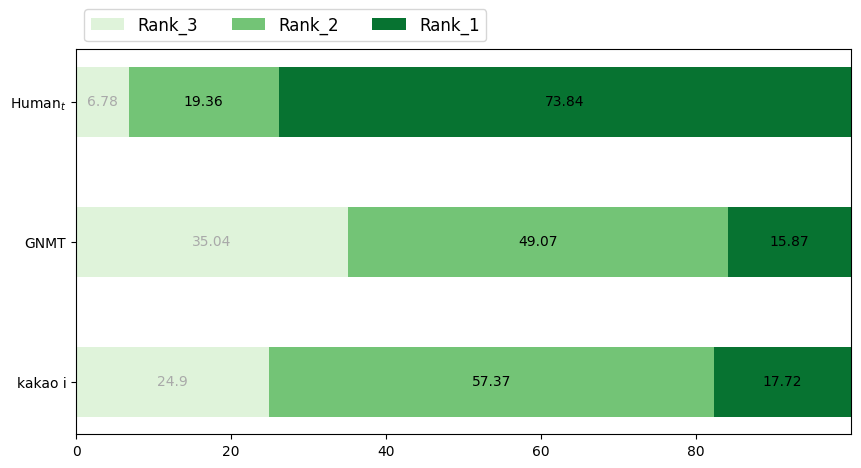

q


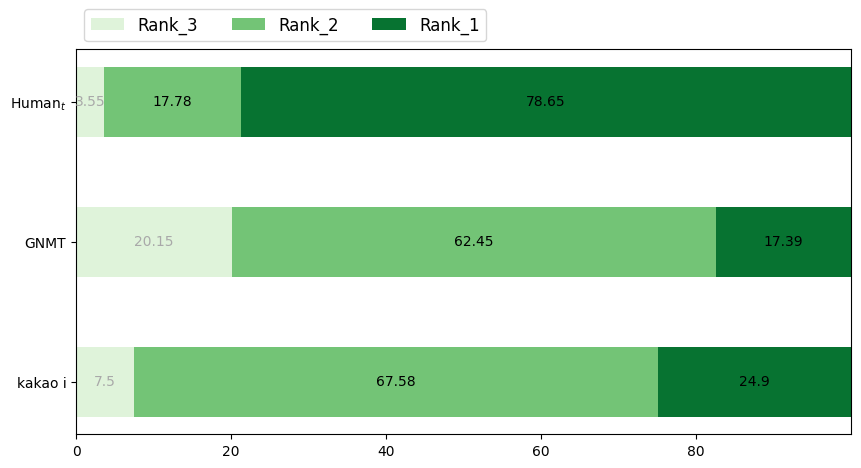

r


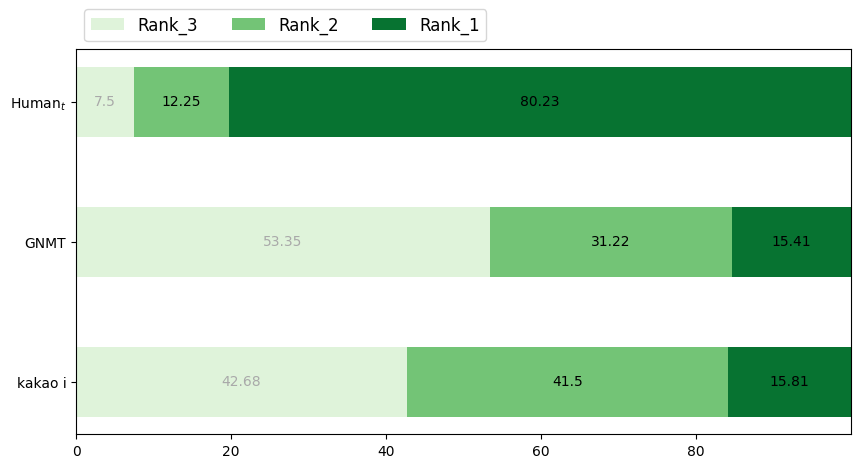

x


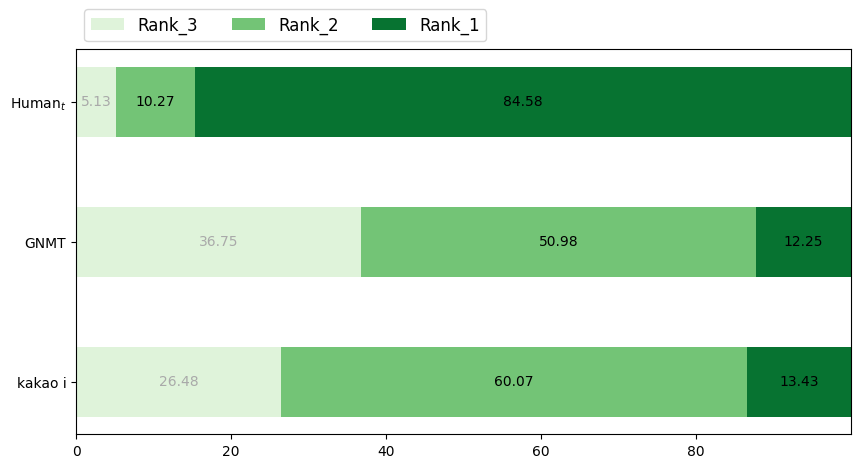

y


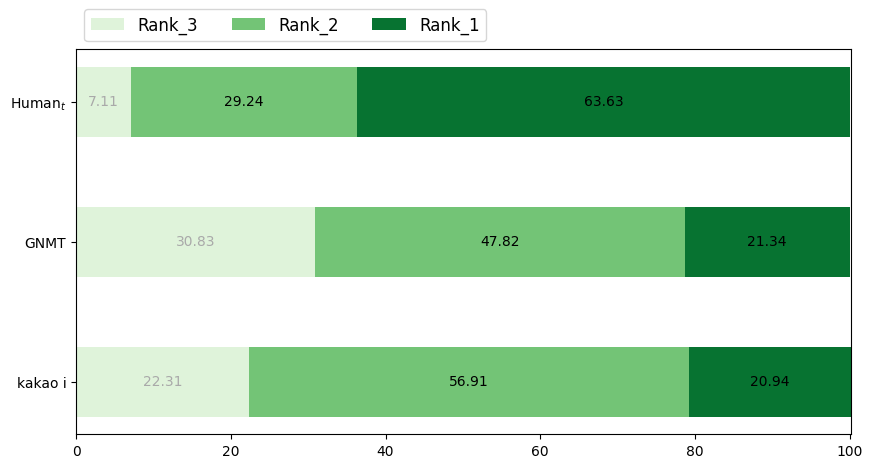

z


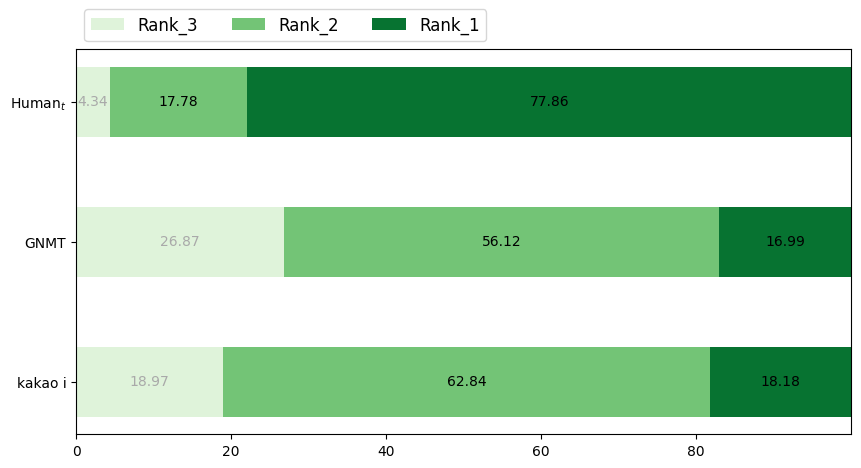

In [89]:
for i, (person, data) in enumerate(rank1.items()):
    print(person)
    kwargs = {'labels': data['labels'], 'data': data['data'], 'color': 'Greens'}
    display(bar_horizontal_plot, f'6.7-{i+1}.png', **kwargs)

In [95]:
p1 = {
    'labels': 'kakao_i GNMT Human$_t$'.split(),
    'data': {
        'Rank_1': [15.71, 14.28, 70],
        'Rank_2': [42.55, 35.25, 22.18],
        'Rank_3': [36.36, 48.63, 15],
    }
}
q1 = {
    'labels': 'kakao_i GNMT Human$_t$'.split(),
    'data': {
        'Rank_1': [20.58, 14.37, 65.03],
        'Rank_2': [45.72, 42.24, 12.03],
        'Rank_3': [24.05, 64.55, 11.39],
    }
}
r1 = {
    'labels': 'kakao_i GNMT Human$_t$'.split(),
    'data': {
        'Rank_1': [14.18, 13.82, 71.98],
        'Rank_2': [48.83, 36.74, 14.41],
        'Rank_3': [41.22, 51.52, 7.25],
    }
}
x1 = {
    'labels': 'kakao_i GNMT Human$_t$'.split(),
    'data': {
        'Rank_1': [12.18, 11.11, 76.70],
        'Rank_2': [49.51, 42.01, 8.46],
        'Rank_3': [38.72, 53.75, 7.51],
    }
}
y1 = {
    'labels': 'kakao_i GNMT Human$_t$'.split(),
    'data': {
        'Rank_1': [19.77, 20.14, 60.07],
        'Rank_2': [42.47, 35.69, 21.82],
        'Rank_3': [36.84, 51.31, 11.84],
    }
}
z1 = {
    'labels': 'kakao_i GNMT Human$_t$'.split(),
    'data': {
        'Rank_1': [16.08, 15.03, 68.88],
        'Rank_2': [45.95, 41.04, 13],
        'Rank_3': [37.79, 53.54, 8.66],
    }
}

In [97]:
rank2 ={'p': p1, 'q': q1, 'r': r1, 'x': x1, 'y': y1, 'z': z1}

p


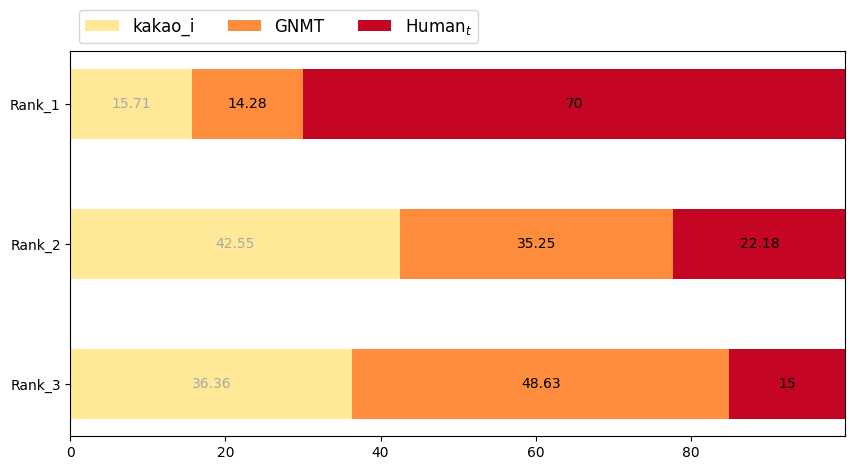

q


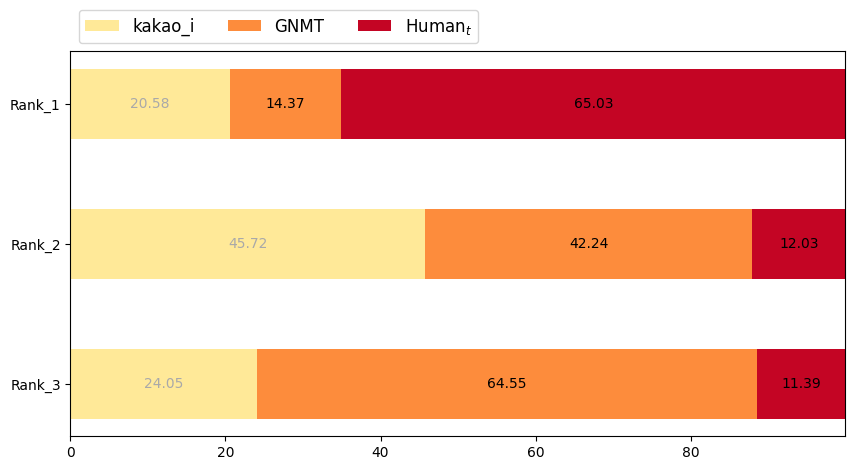

r


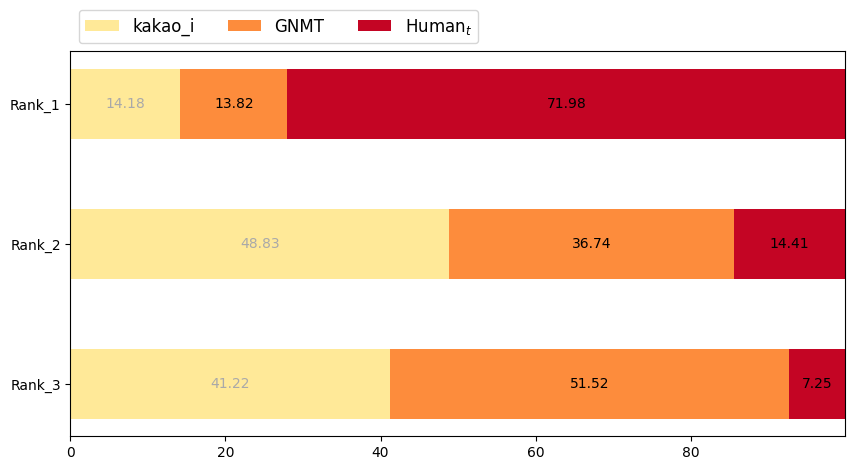

x


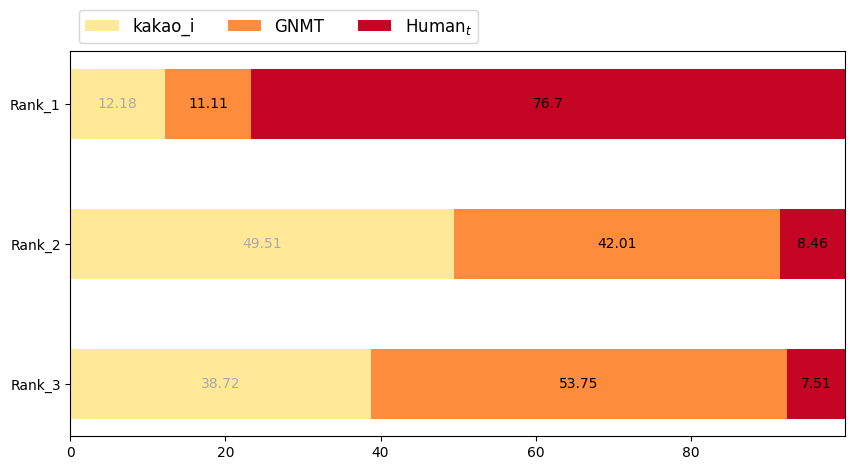

y


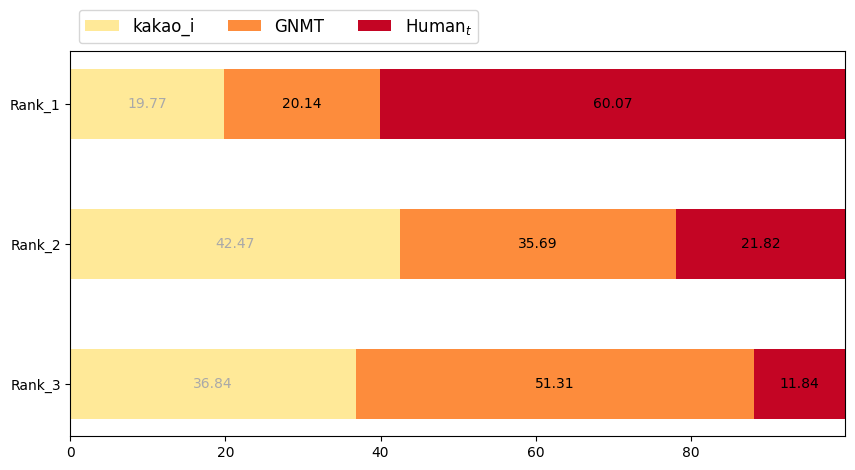

z


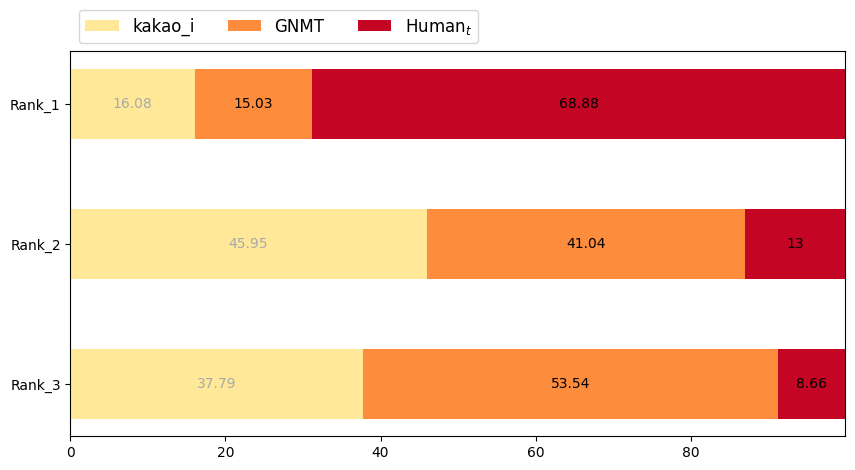

In [98]:
for i, (person, data) in enumerate(rank2.items()):
    print(person)
    kwargs = {'labels': data['labels'], 'data': data['data'], 'color': 'YlOrRd'}
    display(bar_horizontal_plot, f'6.8-{i+1}.png', **kwargs)

In [99]:
data = {'fluency': fluency,
       'adequacy': adequacy,
       'rank1': rank1,
       'rank2': rank2}

with open('data/figures/main_result.json', 'w') as f:
    json.dump(data, f)

### radar

In [100]:
(4 * 0.52 + 4 * 0.3 + 2 * 0.17 + 1 * 0.01) / 4

0.9075

In [103]:
with open('data/figures/main_result.json', 'r') as f:
    data = json.load(f)

In [127]:
data['fluency']

{'labels': ['Incomprehensible(1)', 'Disfluent(2)', 'Good(3)', 'Flawless(4)'],
 'data': {'$P_{judge}$': [1, 17, 30, 52],
  '$Q_{judge}$': [0, 5, 37, 58],
  '$R_{judge}$': [10, 16, 25, 49],
  '$X_{judge}$': [1, 38, 55, 6],
  '$Y_{judge}$': [15, 26, 25, 34],
  '$Z_{judge}$': [2, 17, 32, 49]}}

In [150]:
def score_ratio(data: dict):
    num_data = len(list(data.values())[0])
    scores = list(range(num_data))
    result = {}
    for k, values in data.items():
        num = sum((s+1) * float(vv) / 100 for (s, vv) in zip(scores, values)) / num_data
        result[k] = round(num, 3)
    return result

In [151]:
score_ratio(data['fluency']['data'])

{'$P_{judge}$': 0.833,
 '$Q_{judge}$': 0.883,
 '$R_{judge}$': 0.782,
 '$X_{judge}$': 0.665,
 '$Y_{judge}$': 0.695,
 '$Z_{judge}$': 0.82}

In [152]:
score_ratio(data['adequacy']['data'])

{'$P_{judge}$': 0.678,
 '$Q_{judge}$': 0.813,
 '$R_{judge}$': 0.814,
 '$X_{judge}$': 0.761,
 '$Y_{judge}$': 0.757,
 '$Z_{judge}$': 0.841}

In [153]:
data['rank1']['p']['data']['GNMT'] # 3, 2, 1

[35.04, 49.07, 15.87]

In [154]:
score_ratio(data['rank1']['p']['data'])

{'Human$_t$': 0.89, 'GNMT': 0.603, 'kakao i': 0.643}

In [156]:
r_ratio = {}
for user in 'p q r x y z'.split():
    r_ratio[user] = score_ratio(data['rank1'][user]['data'])

In [157]:
r_ratio

{'p': {'Human$_t$': 0.89, 'GNMT': 0.603, 'kakao i': 0.643},
 'q': {'Human$_t$': 0.917, 'GNMT': 0.657, 'kakao i': 0.725},
 'r': {'Human$_t$': 0.909, 'GNMT': 0.54, 'kakao i': 0.577},
 'x': {'Human$_t$': 0.931, 'GNMT': 0.585, 'kakao i': 0.623},
 'y': {'Human$_t$': 0.855, 'GNMT': 0.635, 'kakao i': 0.663},
 'z': {'Human$_t$': 0.912, 'GNMT': 0.634, 'kakao i': 0.664}}

In [160]:
judges = list(data['fluency']['data'].keys())
judges

['$P_{judge}$',
 '$Q_{judge}$',
 '$R_{judge}$',
 '$X_{judge}$',
 '$Y_{judge}$',
 '$Z_{judge}$']

In [165]:
rankings = {j: num for j, num in zip(judges, [v['GNMT'] for v in r_ratio.values()])}

In [168]:
fluencys = score_ratio(data['fluency']['data'])
adequacys = score_ratio(data['adequacy']['data'])

In [169]:
with open('data/figures/gnmt_ratio.json', 'w') as f:
    json.dump({'fluency': fluencys, 'adequacy': adequacys, 'ranking': rankings}, f)

In [193]:
labels = 'Fluency Adequacy Ranking'.split()

In [192]:
# fluency: x, adequacy: y, ranking: z
result = {user: [f, a, r] \
     for (user, f), a, r in zip(fluencys.items(), adequacys.values(), rankings.values())}
result

{'$P_{judge}$': [0.833, 0.678, 0.603],
 '$Q_{judge}$': [0.883, 0.813, 0.657],
 '$R_{judge}$': [0.782, 0.814, 0.54],
 '$X_{judge}$': [0.665, 0.761, 0.585],
 '$Y_{judge}$': [0.695, 0.757, 0.635],
 '$Z_{judge}$': [0.82, 0.841, 0.634]}

In [217]:
def radar_plot(labels: list, data: dict):
    labels_ = labels.copy()
    num_labels = len(labels_)
    angles = np.linspace(0, 2 * np.pi, num_labels, endpoint=False).tolist()

    # 원형 배치를 위해 1번째 값 추가:
    for v in data.values():
        v += v[:1]
    angles += angles[:1]
    labels_ += labels_[:1]
    
    # display:
    fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(polar=True))

    for legend, value in data.items():
        ax.plot(angles, value, linewidth=1, label=legend)
        ax.fill(angles, value, alpha=.3)

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles), labels_)

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    return fig, ax

#radar_plot(labels, result)
#plt.savefig('6.9.png', dpi=300)
#plt.show()

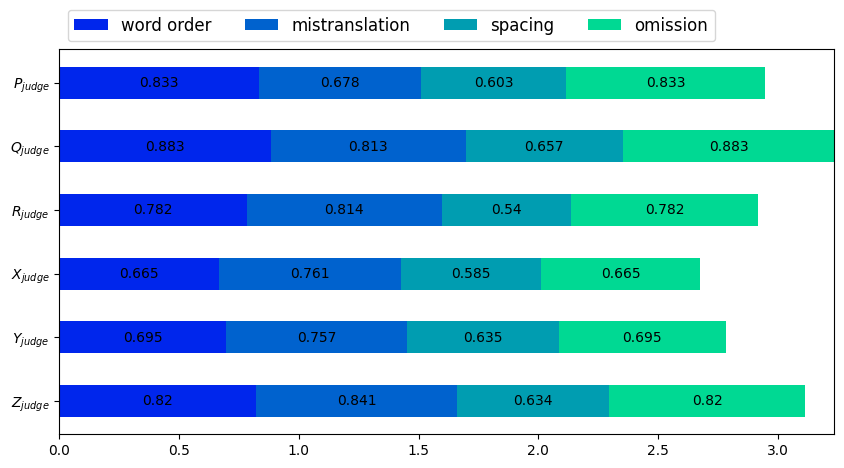

In [215]:
kwargs = {'labels': labels, 'data': result, 'color': 'winter'}
display(bar_horizontal_plot, f'6.9.png', **kwargs)

In [196]:
33.52 / 78.84

0.4251648909183156

In [237]:
labels2 = ['word order', 'mistranslation', 'spacing', 'omission',
         'untranslated', 'grammar', 'addition', 'punctuation', 'style', 'spelling']
data2 = {'raw': list(np.array([115, 783, 465, 314, 
                               116, 73, 48, 34, 48, 1]) / 1997),
        'normalized': list(np.array([3.54, 33.52, 17.85, 10.31, 
                                 4.43, 3.28, 2.19, 1.61, 2.06, 0.05]) / 78.84),
        'half': list(np.array([47.333, 371.167, 0, 145.167, 19.667,
                                   0, 39.667, 5.167, 0, 0]) / 636),
         '': 
        }
data2

{'raw': [0.05758637956935403,
  0.39208813219829747,
  0.2328492739108663,
  0.157235853780671,
  0.05808713069604406,
  0.03655483224837256,
  0.024036054081121683,
  0.01702553830746119,
  0.024036054081121683,
  0.000500751126690035],
 'normalized': [0.04490106544901065,
  0.4251648909183156,
  0.22640791476407915,
  0.13077118214104516,
  0.056189751395230844,
  0.041603247082699135,
  0.027777777777777776,
  0.020421106037544393,
  0.026128868594622018,
  0.0006341958396752917],
 'half': [0.07442295597484276,
  0.5835959119496855,
  0.0,
  0.22825,
  0.03092295597484277,
  0.0,
  0.062369496855345916,
  0.008124213836477987,
  0.0,
  0.0]}

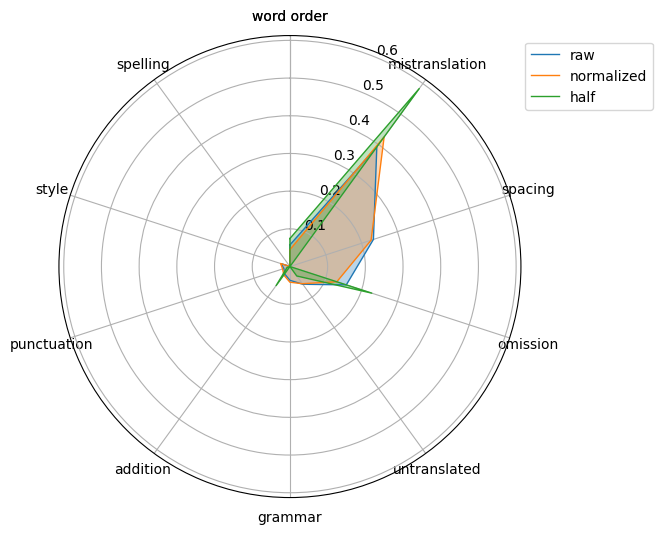

In [238]:
radar_plot(labels2, data2)
plt.savefig('7.4.png', dpi=300)
plt.show()

In [257]:
p = [49, 417, 0, 181, 23, 0, 74, 10, 0, 0]
q = [71, 434, 0, 173, 9, 0, 54, 6, 0, 0]
r = [62, 584, 0, 208, 30, 0, 33, 4, 0, 0]
x = [25, 198, 0, 102, 11, 0, 25, 1, 0, 0]
y = [49, 317, 0, 124, 31, 0, 31, 5, 0, 0]
z = [27, 277, 0, 83, 14, 0, 21, 5, 0, 0]

In [258]:
raw = [115, 783, 465, 314, 116, 73, 48, 34, 48, 1]
norm = [3.54, 33.52, 17.85, 10.31, 4.43, 3.28, 2.19, 1.61, 2.06, 0.05]

In [276]:
f = lambda x: list(np.round(np.array(x) / sum(x), 4) * 100)
f(p)

[6.5, 55.31, 0.0, 24.01, 3.05, 0.0, 9.81, 1.3299999999999998, 0.0, 0.0]

In [ ]:
for d

# error analysis

In [296]:
labels = ['word order', 'mistranslation', 'spacing', 
 'omission', 'untranslated', 'grammar', 
 'addition', 'punctuation', 'style', 'spelling']
data = {
    #'normalized': norm,
    '$P_{judge}$': p,
    '$Q_{judge}$': q,
    '$R_{judge}$': r,
    '$X_{judge}$': x,
    '$Y_{judge}$': y,
    '$Z_{judge}$': z,
    #'raw': raw,
    
}

In [264]:
p

[49, 417, 0, 181, 23, 0, 74, 10, 0, 0]

In [301]:
data1 = {}
for k, v in data.items():
    if k in ('raw', 'normalized'):
        pass
    data1[k] = f(v)

In [288]:
#with open('data/figures/error_analysis.json', 'w') as f:
    #json.dump({'labels': labels, 'data': data}, f)

In [295]:
data1.keys()

dict_keys(['normalized', '$P_{judge}$', '$Q_{judge}$', '$R_{judge}$', '$X_{judge}$', '$Y_{judge}$', '$Z_{judge}$'])

In [ ]:
data1

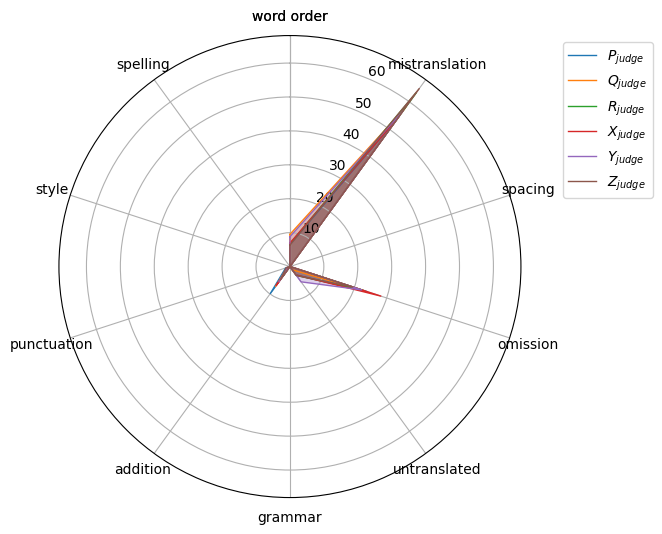

In [302]:
radar_plot(labels, data1)
plt.savefig('7.5.png', dpi=300)
plt.show()

(<Figure size 1000x500 with 1 Axes>, <Axes: >)

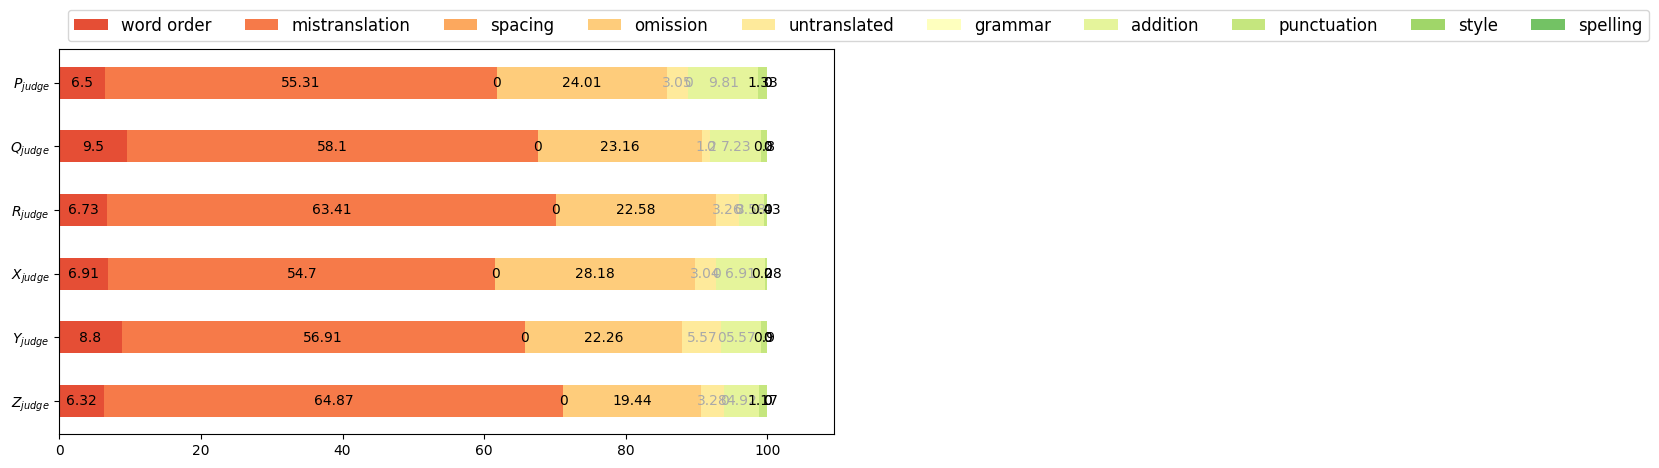

In [299]:
bar_horizontal_plot(labels, data1)

In [303]:
mt = [2, 5, 2, 8, 1, 4, 6, 3, 3, 3, 3, 1, 8, 19, 10]
len(mt)

15

In [306]:
sum(mt)

78

In [304]:
mte = [0] * 9 + [2, 1, 0, 0, 2, 3]
len(mte)

15

In [305]:
pe = [0] * 6 + [1] + [0] * 6 + [1, 9]
len(pe)

15

In [ ]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

In [307]:
import pandas as pd

In [308]:
years = list(range(2004, 2019))
years

[2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018]

In [315]:
data = {'MT': mt, 'MT_Evaluation': mte, 'Post-editing': pe}

In [316]:
df = pd.DataFrame(data=data, index=years)

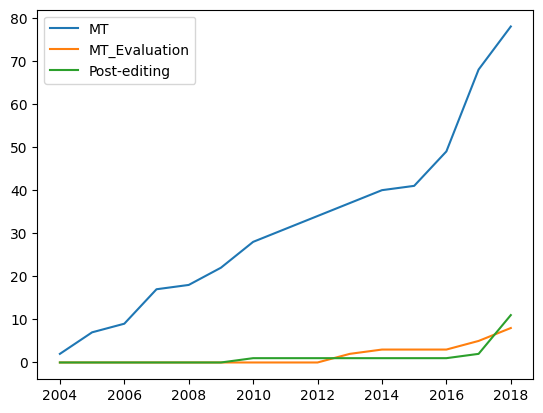

In [326]:
df_.plot()
plt.savefig('1.1.png', dpi=300)
plt.show()

In [323]:
df_ = df.cumsum()